### LOAD MODEL & DAN DATA TEST

In [1]:
import tensorflow as tf
import cv2
import os
import pandas as pd
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
model = tf.keras.models.load_model("A:\Kuliah\Skrpsi\Program\model_cnn11.h5")


In [10]:
folder_path = r"A:\Kuliah\Skrpsi\Program\Image\Test"
file_list = os.listdir(folder_path)
data = []
for file_name in file_list:
    if file_name.endswith(('.jpg', '.png', '.jpeg')):  
        img_path = os.path.join(folder_path, file_name) 
        image = cv2.imread(img_path) 
        if image is not None: 
            data.append([file_name,img_path])  

df = pd.DataFrame(data, columns=["Nama File","path"])

excel_path = r"A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar.xlsx"
df.to_excel(excel_path, index=False)
print(f"Data berhasil disimpan ke {excel_path}")


Data berhasil disimpan ke A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar.xlsx


In [11]:
data=pd.read_excel("A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar(gaboleh diubah).xlsx")
data_shuffled = data.sample(frac=1).reset_index(drop=True)

data_shuffled.to_excel(r"A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar_acak.xlsx", index=False)

print("Data berhasil diacak dan disimpan!")

Data berhasil diacak dan disimpan!


In [12]:
read= pd.read_excel("A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar_acak.xlsx")

In [13]:
#fungsi agar ukuran dari model dan gambar sama 
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) 
    if img is None:
        return None 
    img = cv2.resize(img, (64, 64), interpolation=cv2.INTER_LINEAR) 
    img = img / 255.0  
    img = np.expand_dims(img, axis=-1)  
    img = np.expand_dims(img, axis=0)
    return img #hasil akhirnya nanti (1,64,64,1)

excel_path = r"A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar_acak.xlsx"
df = pd.read_excel(excel_path)

print("Kolom dalam DataFrame:", df.columns)  
if "path" in df.columns:
    path_col = "path"
elif "Path" in df.columns:
    path_col = "Path"
else:
    raise ValueError("Kolom path tidak ditemukan dalam Excel!")

class_labels = {0: "AI FIX", 1: "Human"}  


predictions = [] 
for index, row in df.iterrows():
    image_path = row[path_col] 
    image = preprocess_image(image_path)  
    if image is None:
        print(f"Gagal membaca gambar: {image_path}, dilewati.")
        predictions.append("Error")
        continue
    
    prediction = model.predict(image) 
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = class_labels[predicted_class] 
    
    predictions.append(predicted_label)

df["Predic"] = predictions
output_path = r"A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar_acak.xlsx"
df.to_excel(output_path, index=False)

print(f"Hasil prediksi telah disimpan ke {output_path}")

Kolom dalam DataFrame: Index(['Nama File', 'path', 'Actual', 'Predic'], dtype='object')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

In [14]:
excel_path = r"A:\Kuliah\Skrpsi\Program\hasil_pembacaan_gambar_acak.xlsx"
df = pd.read_excel(excel_path)
df

,Nama File,path,Actual,Predic
0,00631_face_3.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\00631_face...,Human,AI FIX
1,00749_face_2.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\00749_face...,Human,AI FIX
2,person_1653.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_165...,FIX AI,AI FIX
3,person_1862.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_186...,FIX AI,AI FIX
4,00616_face_1.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\00616_face...,Human,AI FIX
...,...,...,...,...
853,02893_face_1.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\02893_face...,Human,AI FIX
854,00722_face_1.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\00722_face...,Human,AI FIX
855,person_1717.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_171...,FIX AI,AI FIX
856,person_1952.jpg,A:\Kuliah\Skrpsi\Program\Image\Test\person_195...,FIX AI,AI FIX


In [15]:
actual = df["Actual"]
predicted = df["Predic"]
cm = confusion_matrix(actual, predicted, labels=["AI FIX", "Human"])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Human", "AI FIX"], yticklabels=["Human", "AI FIX"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

NameError: name 'confusion_matrix' is not defined

In [ ]:
df_filtered = df[df["Predic"] != "Error"].sample(frac=1).head(6)
plt.figure(figsize=(12, 6))

for i, row in enumerate(df_filtered.itertuples()):
    image_path = row.path  
    actual_label = row.Actual  
    predicted_label = row.Predic 
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img, (64, 64))
    else:
        continue  
    plt.subplot(2, 3, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Actual: {actual_label}\nPredic: {predicted_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

### UJI DATA BARU

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

In [ ]:
model = tf.keras.models.load_model("A:\Kuliah\Skrpsi\Program\model_cnn11.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
                                          Path Gambar  Prediksi  Akurasi
0     A:\Kuliah\Skrpsi\Program\Test\download (10).jpg         0   -100.0
1         A:\Kuliah\Skrpsi\Program\Test\Face (1).jpeg         0   -100.0
2         A:\Kuliah\Skrpsi\Program\Test\Face (2).jpeg         0   -100.0
3         A:\Kuliah\Skrpsi\Program\Test\Face (3).jpeg         0   -100.0
4         A:\Kuliah\Skrpsi\Program\Test\Face (4).jpeg         0   -100.0
5         A:\Kuliah\Skrpsi\Program\Test\Face (5).jpeg         0   -100.0
6   A:\Kuliah\Skrpsi\Program\Test\WhatsApp Image 2...         0   -100

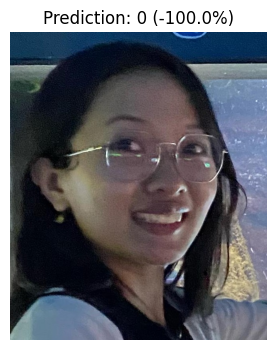

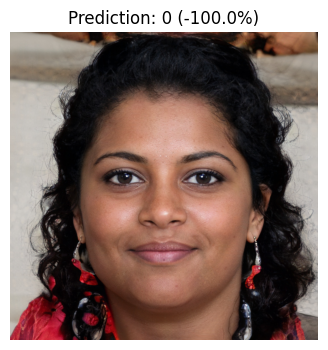

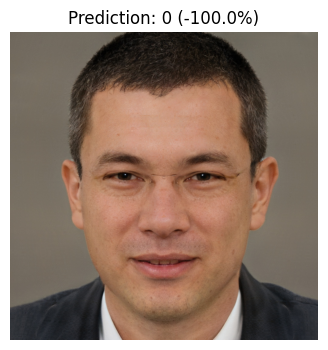

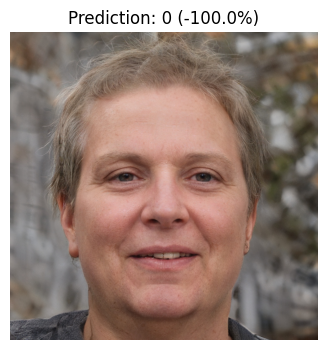

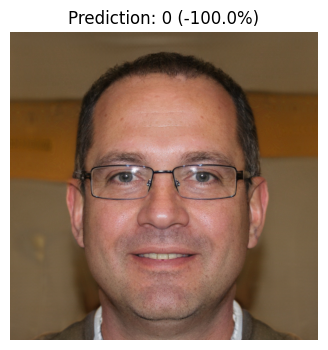

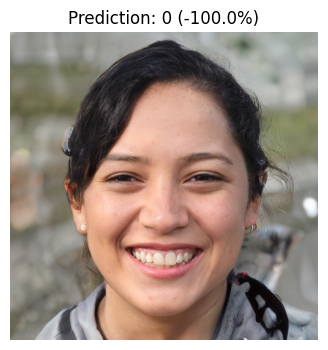

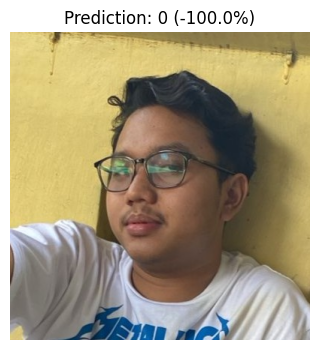

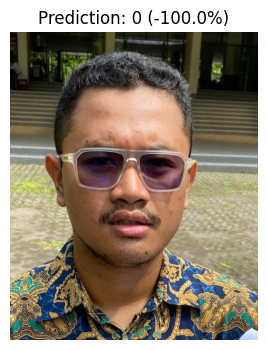

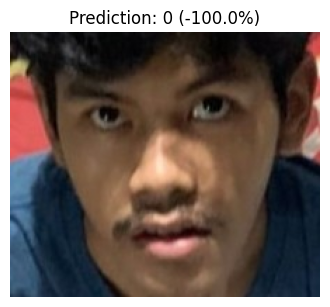

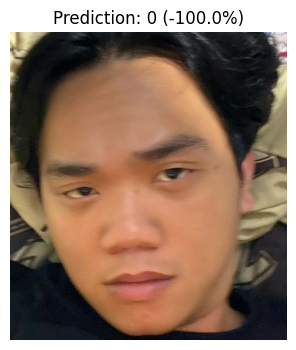

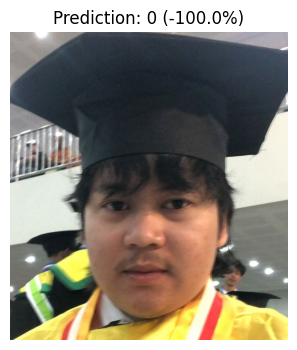

In [ ]:
folder_path = r"A:\Kuliah\Skrpsi\Program\Test"
file_list = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
predictions = []
threshold = 0.5 

for file_name in file_list:
    img_path = os.path.join(folder_path, file_name)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if image is not None:
        image_resized = cv2.resize(image, (64, 64)) 
        image_resized = image_resized / 255.0
        image_resized = np.expand_dims(image_resized, axis=-1) 
        image_resized = np.expand_dims(image_resized, axis=0) 
        pred = model.predict(image_resized)[0][0]      
        predicted_label = 1 if pred > threshold else 0
        confidence_score = round(pred * 100, 2)
        predictions.append({
            "Path Gambar": img_path,
            "Prediksi": predicted_label,
            "Akurasi": confidence_score
        })

    else:
        print(f"Gagal membaca: {file_name}")
df = pd.DataFrame(predictions)
df.to_csv("Data_Test_wajah_asli_teman-teman.csv", index=False)
print(df)
for row in df.itertuples():
    image_path = row._1 
    predicted_label = row.Prediksi
    confidence_score = row.Akurasi
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    if img is not None:
        plt.figure(figsize=(4, 4)) 
        plt.imshow(img)
        plt.title(f"Prediction: {predicted_label} ({confidence_score}%)")
        plt.axis("off")
        plt.show() 


                                                Path  Prediksi  Confidence (%)
0  A:\Kuliah\Skrpsi\Program\test no prepro\downlo...         0           22.03
1  A:\Kuliah\Skrpsi\Program\test no prepro\Face (...         0            0.01
2  A:\Kuliah\Skrpsi\Program\test no prepro\Face (...         0            5.47
3  A:\Kuliah\Skrpsi\Program\test no prepro\Face (...         0           27.98
4  A:\Kuliah\Skrpsi\Program\test no prepro\Face (...         0            0.76
5  A:\Kuliah\Skrpsi\Program\test no prepro\Face (...         0            0.01
6  A:\Kuliah\Skrpsi\Program\test no prepro\WhatsA...         0            4.51
7  A:\Kuliah\Skrpsi\Program\test no prepro\WhatsA...         0            6.28
8  A:\Kuliah\Skrpsi\Program\test no prepro\WhatsA...         1           94.32
9  A:\Kuliah\Skrpsi\Program\test no prepro\WhatsA...         1           73.27


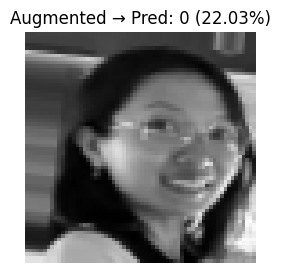

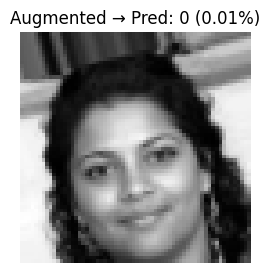

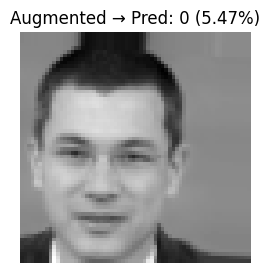

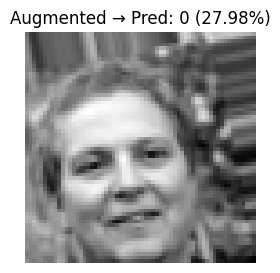

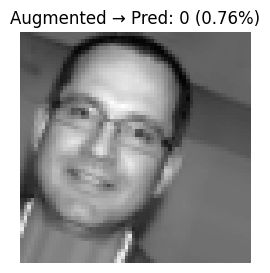

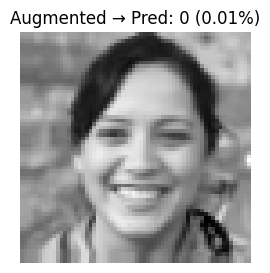

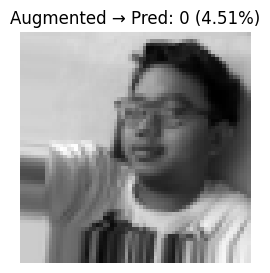

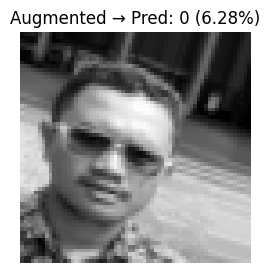

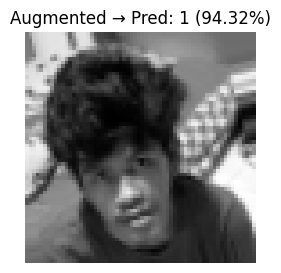

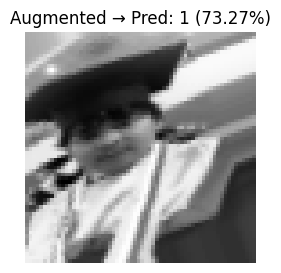

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10,
    height_shift_range=0.15
)

model = load_model('A:/Kuliah/Skrpsi/Program/model_cnn6.h5')

folder_path = r"A:\Kuliah\Skrpsi\Program\test no prepro"
file_list = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg','.png','.jpeg'))]

results = []
threshold = 0.5

for file_name in file_list:
    img_path = os.path.join(folder_path, file_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Gagal membaca: {file_name}")
        continue

    img = cv2.resize(img, (64,64), interpolation=cv2.INTER_AREA)
    img = img.astype('float32') / 255.0       
    img = np.expand_dims(img, axis=-1)
    aug = datagen.random_transform(img)        
    aug_batch = np.expand_dims(aug, axis=0)   
    pred = model.predict(aug_batch, verbose=0)[0][0]
    label = 1 if pred > threshold else 0
    score = round(pred*100,2)
    results.append({
        "path": img_path,
        "augmented": aug,
        "label": label,
        "score": score
    })
df = pd.DataFrame([{
    "Path": r["path"],
    "Prediksi": r["label"],
    "Confidence (%)": r["score"]
} for r in results])
df.to_csv("Data_Test_wajah_augmented.csv", index=False)
print(df)
for r in results:
    aug_img = r["augmented"].squeeze()
    plt.figure(figsize=(3,3))
    plt.imshow(aug_img, cmap='gray')
    plt.title(f"Augmented → Pred: {r['label']} ({r['score']}%)")
    plt.axis('off')
    plt.show()
